In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
data=pd.read_csv(r"C:\Users\Praveen T\Downloads\titanic.csv")

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# number of columns present in the dataset.
len(data.columns)

12

In [6]:
# number of rows present in the dataset.
len(data)

891

In [7]:
# Descriptive statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# finding number of missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# solving the missing values -> 1 : Export Product Share (%) contains 100 in all the columns -> so just taking avg and replacing it in missing places.

data['Age'].fillna(data['Age'].mean(),inplace=True)

In [12]:
# Fill missing Cabin values with the most common Cabin value
most_common_cabin = data['Cabin'].mode()[0]
data['Cabin'].fillna(most_common_cabin, inplace=True)

In [16]:
# Fill missing Embarked values using backward fill method
data['Embarked'].fillna(method='bfill', inplace=True)

In [17]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


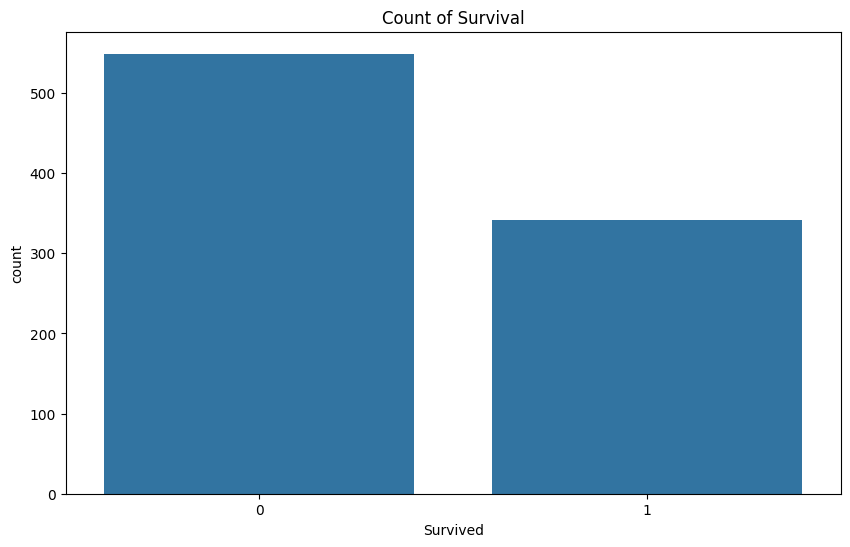

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Survived')
plt.title('Count of Survival')
plt.show()

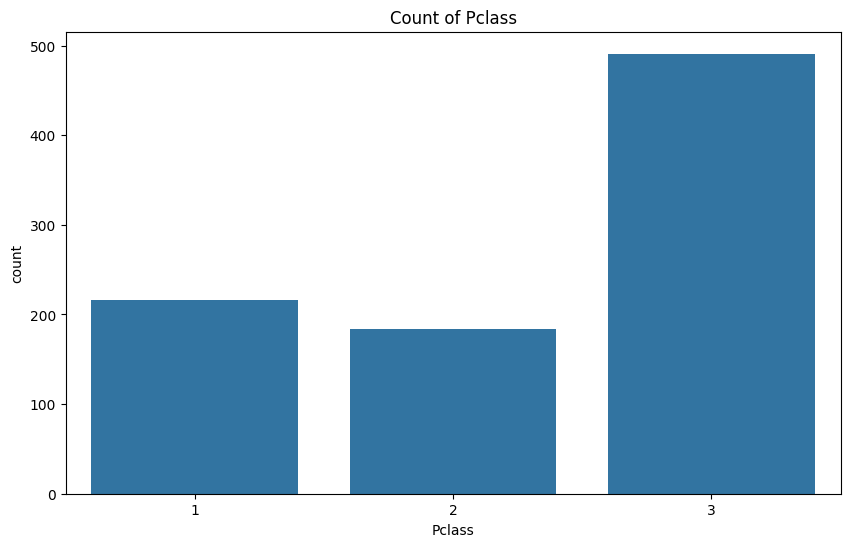

In [22]:
# Countplot of Pclass
plt.figure(figsize=(10, 6))
sns.countplot(data, x='Pclass')
plt.title('Count of Pclass')
plt.show()

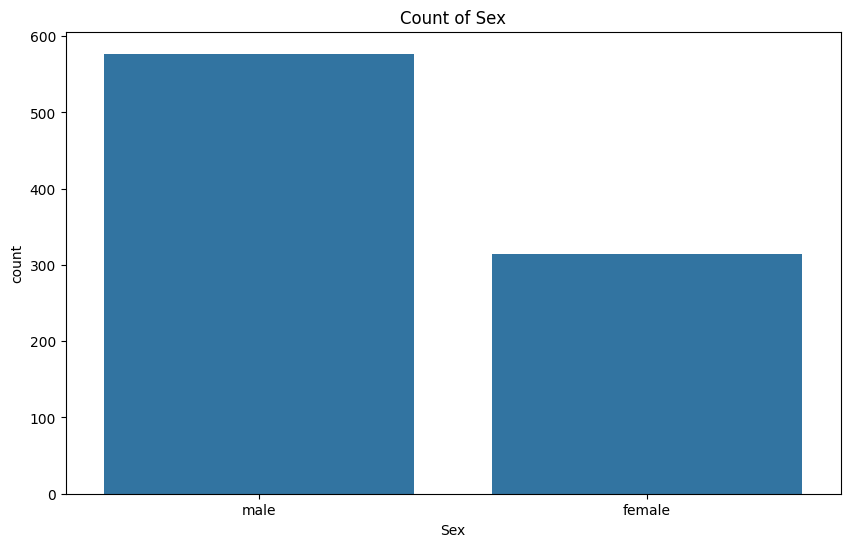

In [30]:
# Countplot of Sex
plt.figure(figsize=(10, 6))
sns.countplot(data, x='Sex')
plt.title('Count of Sex')
plt.show()

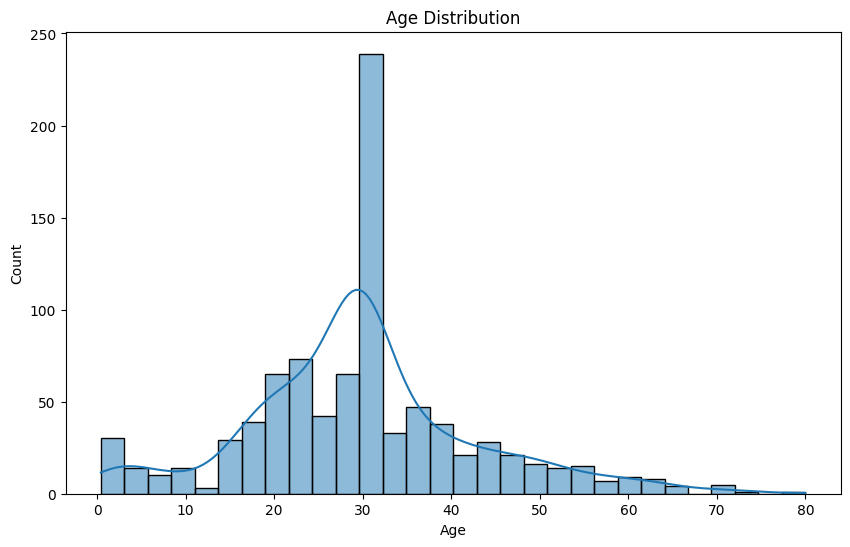

In [23]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Age', kde=True)
plt.title('Age Distribution')
plt.show()

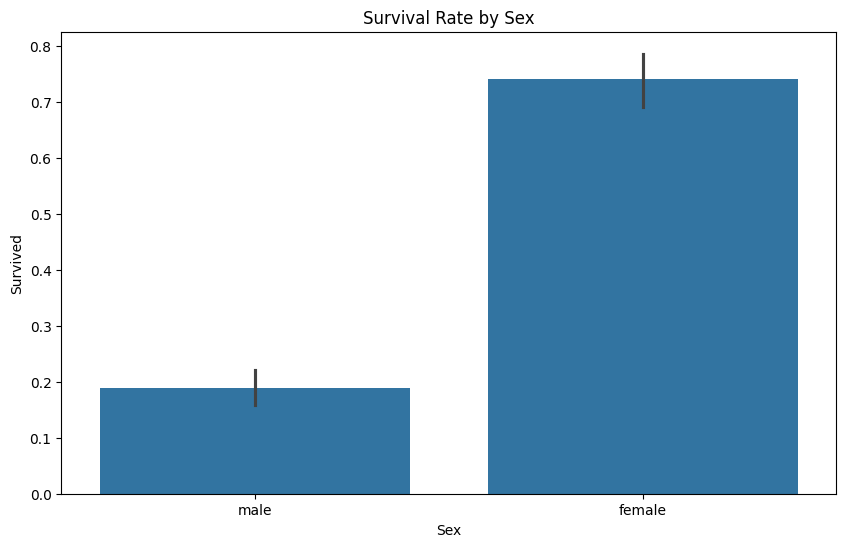

In [24]:
# Survival rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(data, x='Sex', y='Survived')
plt.title('Survival Rate by Sex')
plt.show()

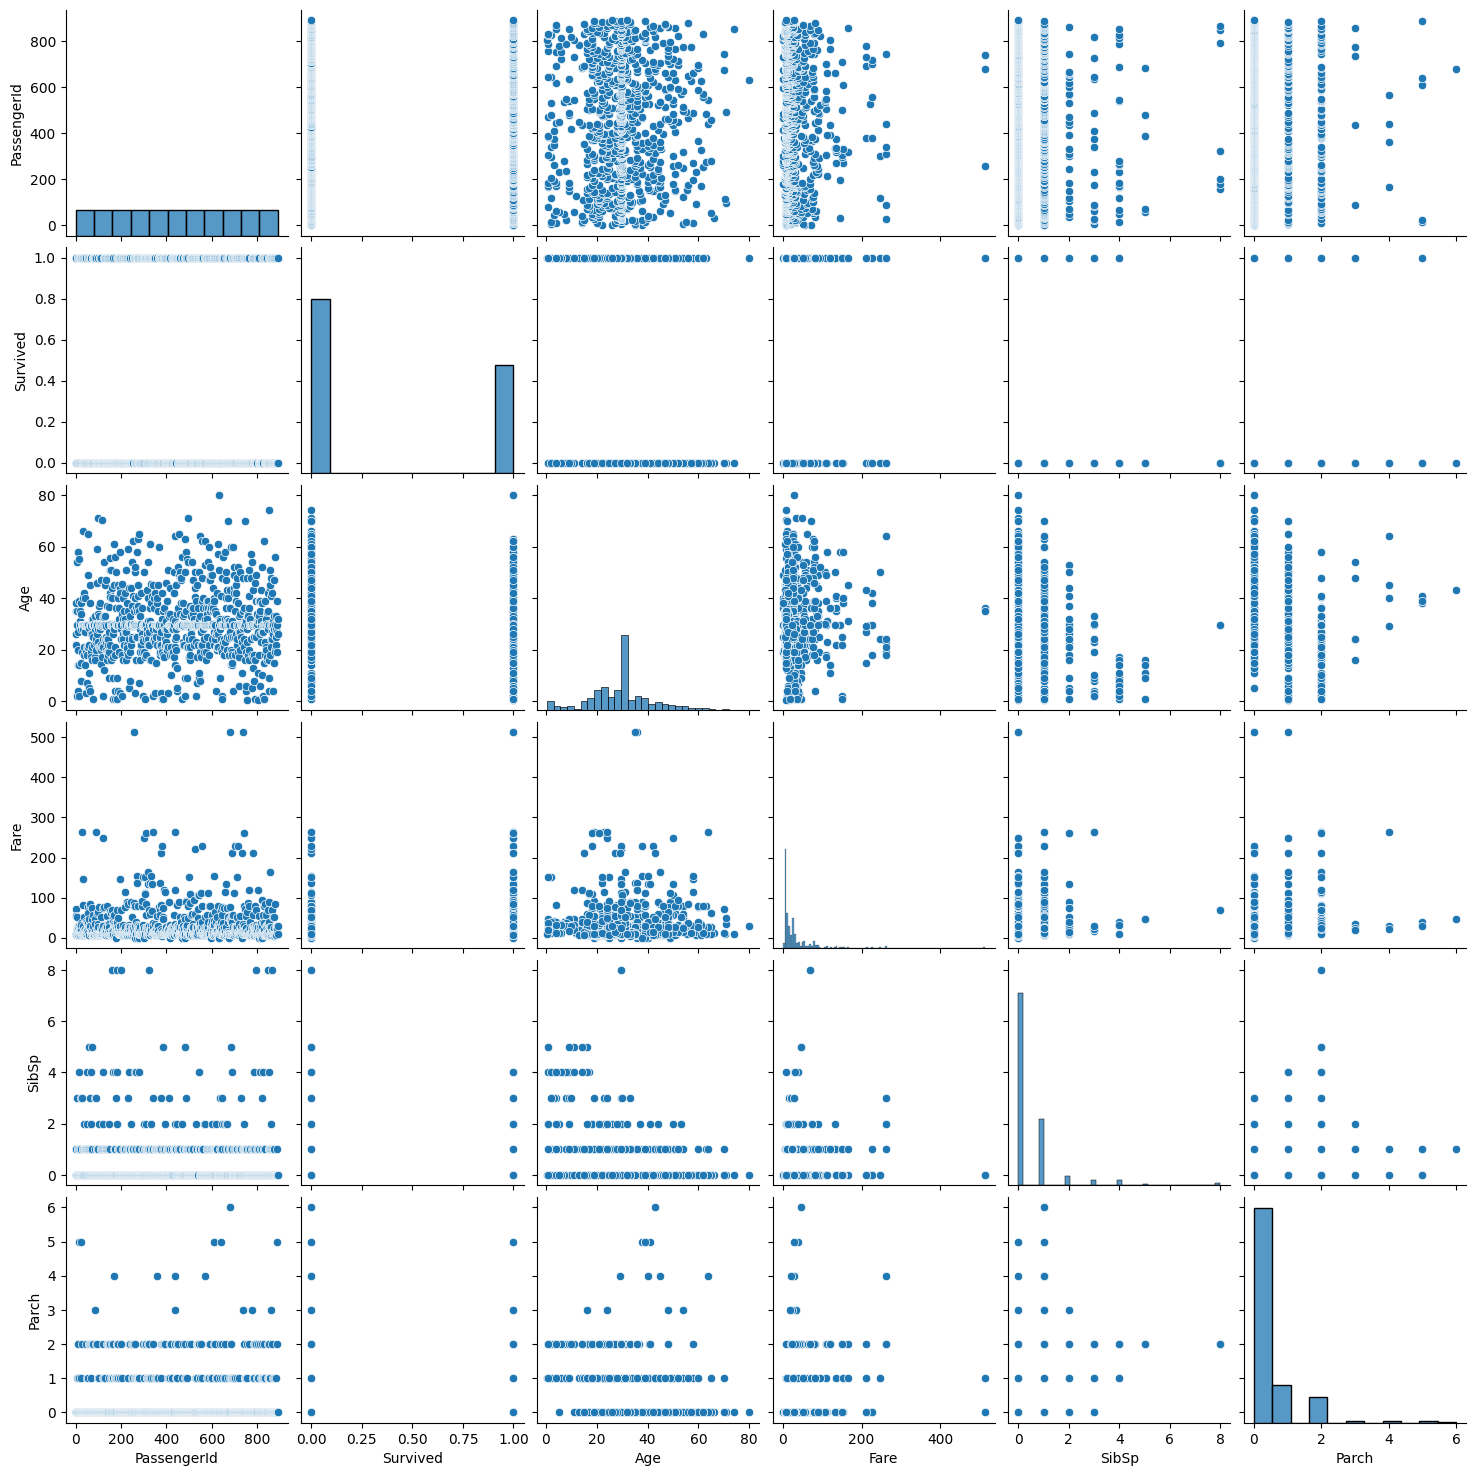

In [29]:
# Pairplot for numerical features
sns.pairplot(data[['PassengerId','Survived', 'Age', 'Fare', 'SibSp', 'Parch']])
plt.show()

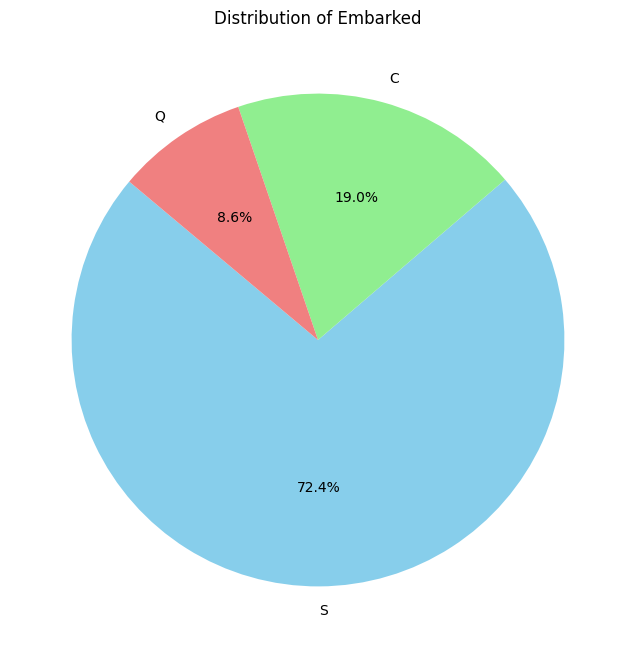

In [31]:
# Create a pie chart for the 'Embarked' column
embarked_counts = data['Embarked'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Embarked')
plt.show()